<h1><center>Supply Chain Analysis</center></h1>

**Dataset Description**

For the project,I am analysing the demand of online retail sales. I have used the dataset online_retail_11(https://archive.ics.uci.edu/ml/datasets/Online+Retail+II) from UCI machine learning repository. This dataset contains the details of the dealings in a online retail store located in UK between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. The dataset has eight attributes InvoiceNo, StockCode, Description, Quantity,InvoiceDate, UnitPrice, CustomerID and Country. We have created a new column called demand by taking the product of UnitPrice and Quantity.

For this project, I am using the following analysing methods for prediction:
<br> 
**Moving Average**
<br>
**Exponential Smoothing**
<br>
**ARIMA**
<br>
**LSTM (deep learning)**
<br>
**Machine learning**

**Package Import**

In [66]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from datetime import datetime,date
import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [67]:
df1= pd.read_csv(r'C:\Users\yoges\Downloads\online_retail_II.csv', parse_dates=True, index_col =0)
pd.options.display.float_format = '{:,.2f}'.format
df1

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
Invoice,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,"17,850.00",United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,"17,850.00",United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
...,...,...,...,...,...,...,...
581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,"12,680.00",France
581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,"12,680.00",France
581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,"12,680.00",France


## Data Preprocessing

**Checking the null values**

In [68]:
df1.isnull().sum()

StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [69]:
df = df1.dropna() #dropping the null values

In [70]:
df.isnull().sum() #rechecking the null values

StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [71]:
df.shape  # finding the shape of the dataset

(406830, 7)

In [72]:
df['date'] = pd.to_datetime(df['InvoiceDate']).dt.date #converting datetime to the date format


In [73]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date
Invoice,,,,,,,,
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,"17,850.00",United Kingdom,2010-12-01
536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom,2010-12-01
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,"17,850.00",United Kingdom,2010-12-01
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom,2010-12-01
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom,2010-12-01


In [74]:
df.drop(['InvoiceDate'],axis=1,inplace= True) 

<AxesSubplot:xlabel='Price'>

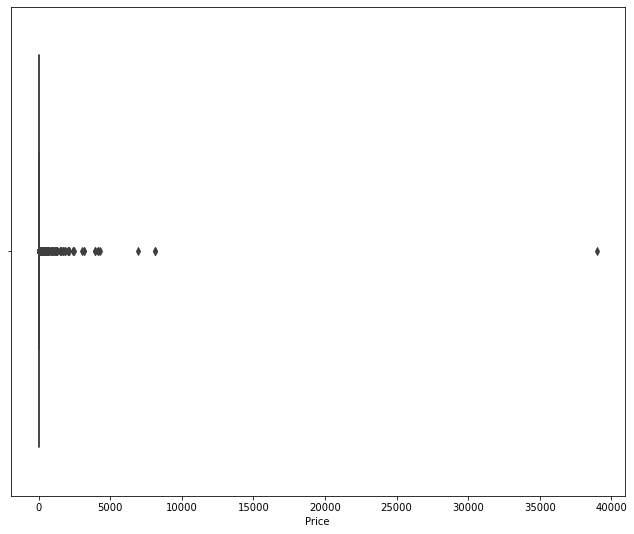

In [75]:
import seaborn as sns
sns.boxplot(x=df['Price'])


<AxesSubplot:xlabel='Quantity'>

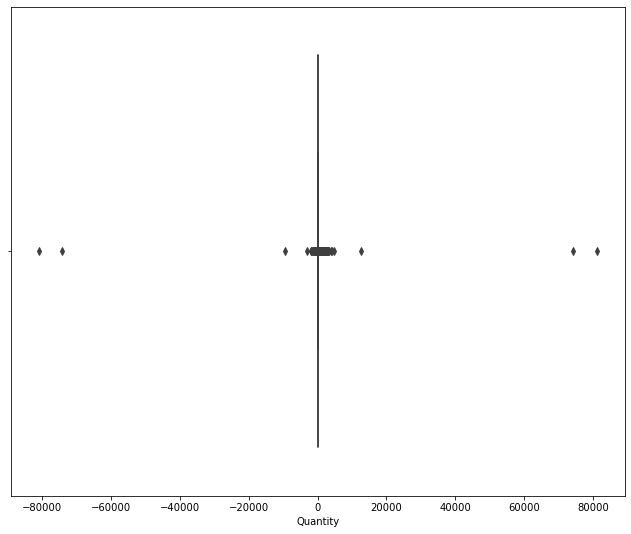

In [76]:
sns.boxplot(x=df['Quantity'])


In [77]:
#drop duplicated values
print('Number of duplicated records: ',df.duplicated(keep='first').sum())


indx = df[df.duplicated(keep='first')].index
df.drop(index = indx, inplace= True)

Number of duplicated records:  6670


In [78]:
#Removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity         10.00
Price             2.50
Customer ID   2,975.00
dtype: float64


In [79]:
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

         Country  Customer ID  Description  Price  Quantity  StockCode   date
Invoice                                                                      
536365     False        False        False  False     False      False  False
536365     False        False        False  False     False      False  False
536365     False        False        False  False     False      False  False
536365     False        False        False  False     False      False  False
536365     False        False        False  False     False      False  False
...          ...          ...          ...    ...       ...        ...    ...
581587     False        False        False  False     False      False  False
581587     False        False        False  False     False      False  False
581587     False        False        False  False     False      False  False
581587     False        False        False  False     False      False  False
581587     False        False        False   True     False     

In [80]:
df =  df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(243927, 7)

In [81]:
df['Demand'] = df['Price'] * df['Quantity']

In [82]:
df = df.drop(['Description','Customer ID','Country','StockCode','Price','Quantity'], axis = 1)

In [83]:
df.head()

,date,Demand
Invoice,,
536365,2010-12-01,15.30
536365,2010-12-01,20.34
536365,2010-12-01,22.00
536365,2010-12-01,20.34
536365,2010-12-01,20.34


In [84]:
df = df.set_index('date')

## 1.Moving Average

Calculating  the simple moving average over few periods

In [85]:
# the simple moving average over a period of 5 
df['SMA_5'] = df.Demand.rolling(5, min_periods=1).mean()
# the simple moving average over a period of 10 
df['SMA_10'] = df.Demand.rolling(10, min_periods=1).mean()
# the simple moving average over a period of 20 
df['SMA_15'] = df.Demand.rolling(15, min_periods=1).mean()
df.head()

,Demand,SMA_5,SMA_10,SMA_15
date,,,,
2010-12-01,15.30,15.30,15.30,15.30
2010-12-01,20.34,17.82,17.82,17.82
2010-12-01,22.00,19.21,19.21,19.21
2010-12-01,20.34,19.50,19.50,19.50
2010-12-01,20.34,19.66,19.66,19.66


In [86]:
df['Error_10']=df['Demand']-df['SMA_10']
df.head()

,Demand,SMA_5,SMA_10,SMA_15,Error_10
date,,,,,
2010-12-01,15.30,15.30,15.30,15.30,0.00
2010-12-01,20.34,17.82,17.82,17.82,2.52
2010-12-01,22.00,19.21,19.21,19.21,2.79
2010-12-01,20.34,19.50,19.50,19.50,0.84
2010-12-01,20.34,19.66,19.66,19.66,0.68


**Plotting  the moving average over the periods calculated**

Text(0, 0.5, 'Demand')

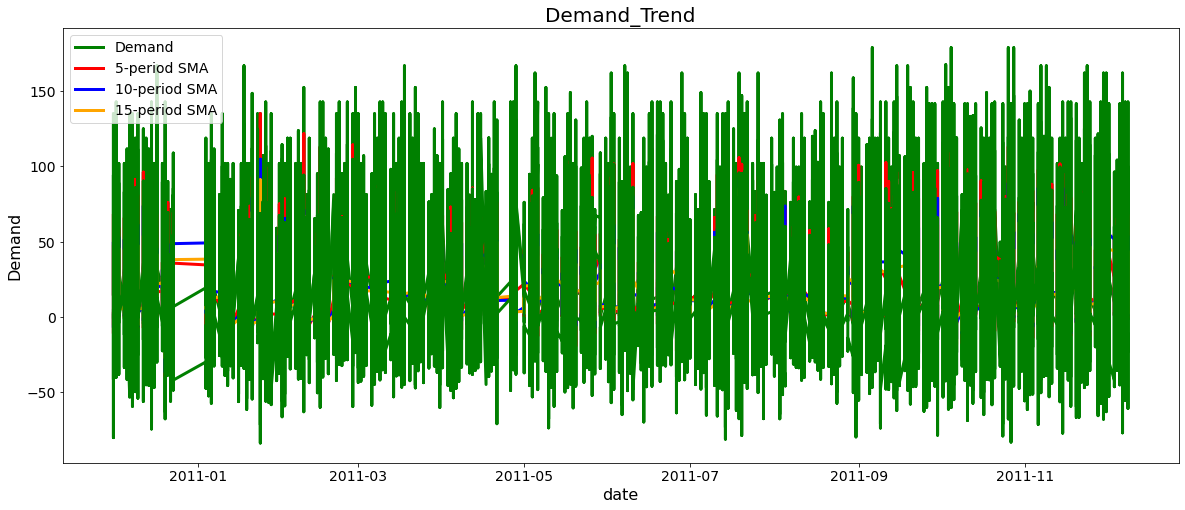

In [87]:
colors = ['green', 'red', 'blue', 'orange']
# line plot for price
df.plot(color=colors, linewidth=3, figsize=(20,8))
# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Demand', '5-period SMA', '10-period SMA', '15-period SMA'], fontsize=14)
# title and labels
plt.title('Demand_Trend', fontsize=20)
plt.xlabel('date', fontsize=16)
plt.ylabel('Demand', fontsize=16)

**Performance metrics of simple moving average**

In [88]:
MAE = df["Error_10"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df["Error_10"]**2).mean())
print("RMSE:",round(RMSE,2))
MSE= (df["Error_10"]**2).mean()
print("MSE:",round(MSE,2))

MAE: 7.25
RMSE: 12.02
MSE: 144.4


## Exponential smoothing

#### Simple Exponential Smoothing

(193927, 5)
(50000, 5)


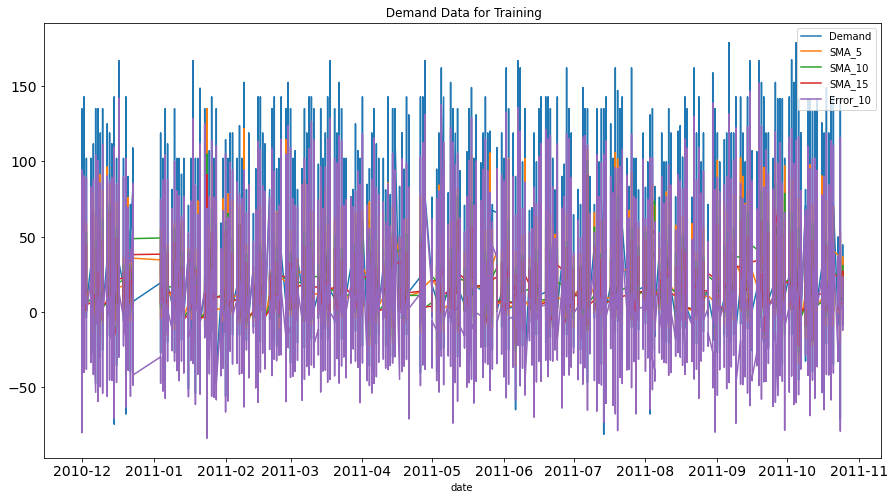

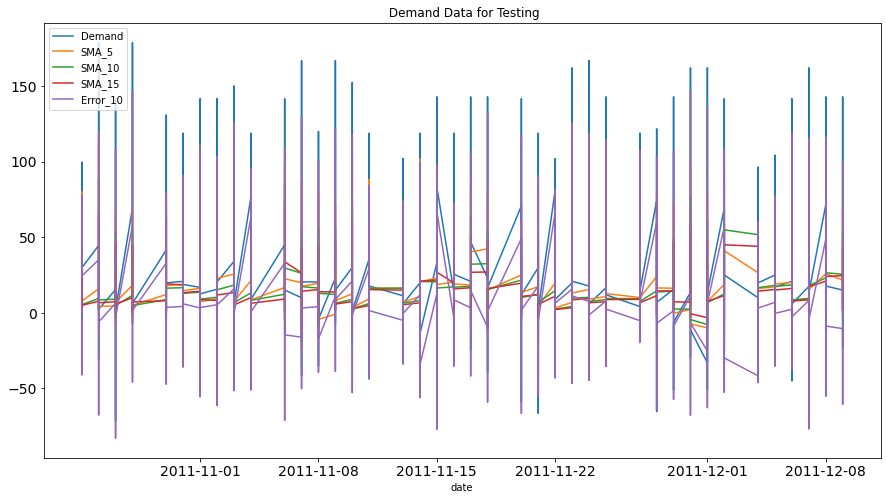

In [89]:

train=df[0:-50000] 
test=df[-50000:]
print(train.shape)
print(test.shape)

# Plotting train and test data
train.plot(figsize=(15,8), title= ' Demand Data for Training', fontsize=14)
test.plot(figsize=(15,8), title= ' Demand Data for Testing', fontsize=14)
plt.show()

**Calculating and plotting the performance metrics of Simple Exponential Smoothing**

MAE 10.65
MSE 289.99
RMSE 17.03


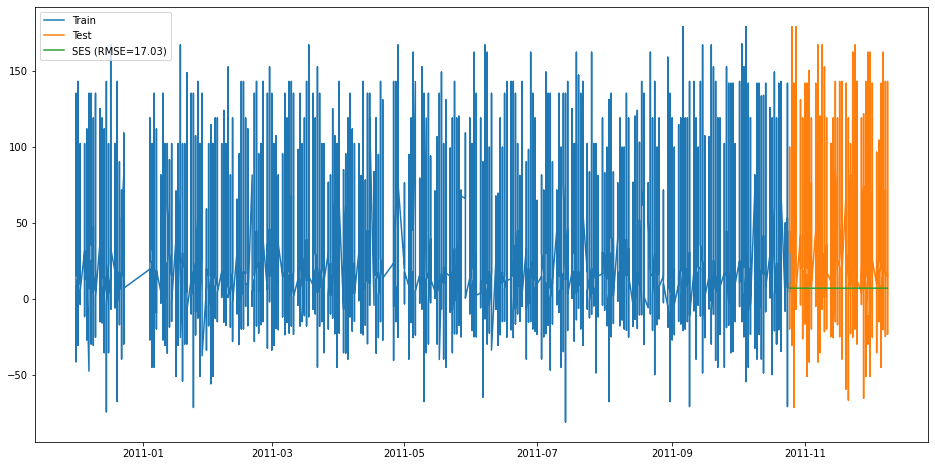

,Demand,SMA_5,SMA_10,SMA_15,Error_10,SES
date,,,,,,
2011-10-25,9.96,10.76,14.94,14.47,-4.98,6.96
2011-10-25,6.72,9.11,12.07,13.82,-5.35,6.96
2011-10-25,15.00,8.64,11.09,13.72,3.91,6.96
2011-10-25,11.70,10.07,11.24,13.93,0.46,6.96
2011-10-25,12.50,11.18,10.75,14.20,1.75,6.96


In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# Fit the model
pred = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Demand'])).fit(smoothing_level=0.8,optimized=False)
pred['SES'] = fit2.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Demand, pred.SES)
mse=mean_squared_error(test.Demand, pred.SES)
rmse = sqrt(mean_squared_error(test.Demand, pred.SES))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['SES'], label='SES (RMSE={:.2f})'.format(rmse)) 
plt.legend()
plt.show()
pred.head()

#### Double Exponential Smoothing

MAE 20,986.82
MSE 587,176,025.73
RMSE 24,231.72


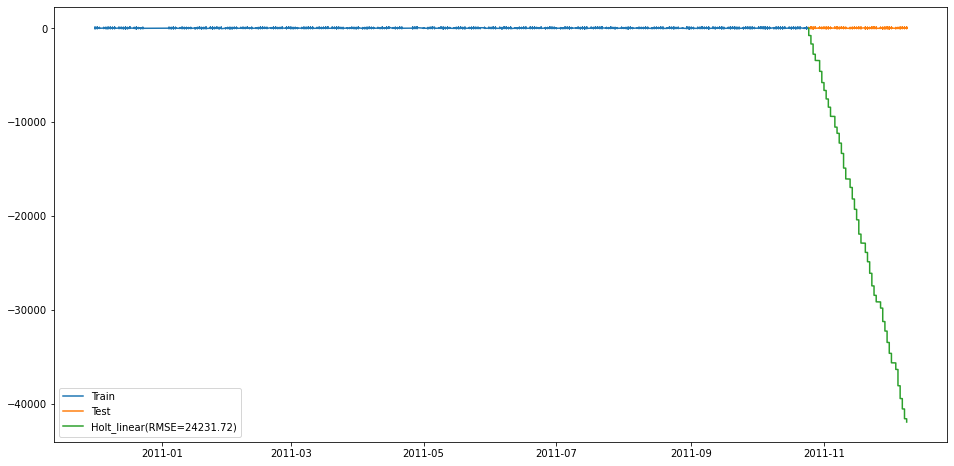

,Demand,SMA_5,SMA_10,SMA_15,Error_10,Holt_linear
date,,,,,,
2011-10-25,9.96,10.76,14.94,14.47,-4.98,8.65
2011-10-25,6.72,9.11,12.07,13.82,-5.35,7.81
2011-10-25,15.00,8.64,11.09,13.72,3.91,6.97
2011-10-25,11.70,10.07,11.24,13.93,0.46,6.13
2011-10-25,12.50,11.18,10.75,14.20,1.75,5.29


In [91]:
pred = test.copy()
fit1 = Holt(np.asarray(train['Demand'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
pred['Holt_linear'] = fit1.forecast(len(test))
# Calculate KPI
mae = mean_absolute_error(test.Demand, pred.Holt_linear)
mse=mean_squared_error(test.Demand, pred.Holt_linear)
rmse = sqrt(mean_squared_error(test.Demand, pred.Holt_linear))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear(RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

pred.head()

#### Triple Exponential Smoothing

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

MAE 4,036.67
MSE 21,712,905.91
RMSE 4,659.71


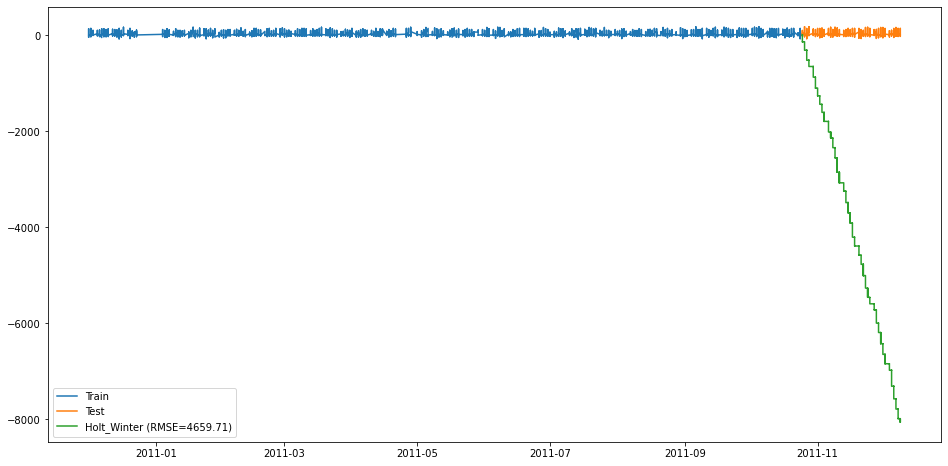

In [93]:
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Demand']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()

pred['Holt_Winter'] = fit1.forecast(len(test))
# Calculate KPI's
mae = mean_absolute_error(test.Demand, pred.Holt_Winter)
mse=mean_squared_error(test.Demand, pred.Holt_Winter)
rmse = sqrt(mean_squared_error(test.Demand, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
# Plot
plt.figure(figsize=(16,8))
plt.plot( train['Demand'], label='Train')
plt.plot(test['Demand'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse))

plt.legend()
plt.show()

In [94]:
pred

,Demand,SMA_5,SMA_10,SMA_15,Error_10,Holt_Winter
date,,,,,,
2011-10-25,9.96,10.76,14.94,14.47,-4.98,8.70
2011-10-25,6.72,9.11,12.07,13.82,-5.35,10.21
2011-10-25,15.00,8.64,11.09,13.72,3.91,12.15
2011-10-25,11.70,10.07,11.24,13.93,0.46,10.51
2011-10-25,12.50,11.18,10.75,14.20,1.75,8.42
...,...,...,...,...,...,...
2011-12-09,10.20,16.16,16.54,22.44,-6.34,"-8,051.89"
2011-12-09,12.60,15.68,15.82,21.72,-3.22,"-8,053.98"
2011-12-09,16.60,15.88,15.50,21.25,1.10,"-8,054.18"


## ARIMA

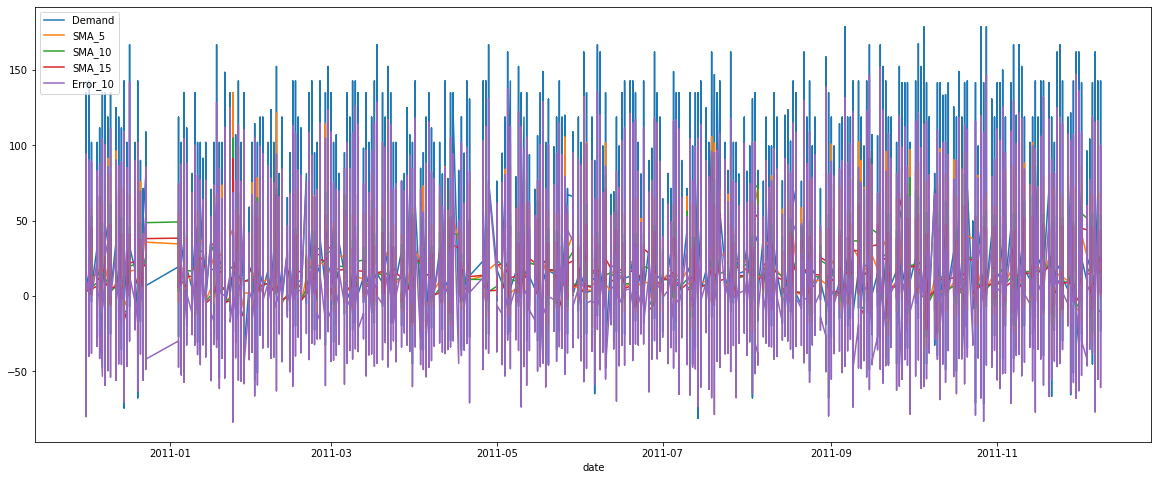

In [95]:
# viewing the dataset stored as df
df.plot(figsize=(20,8))
plt.show()

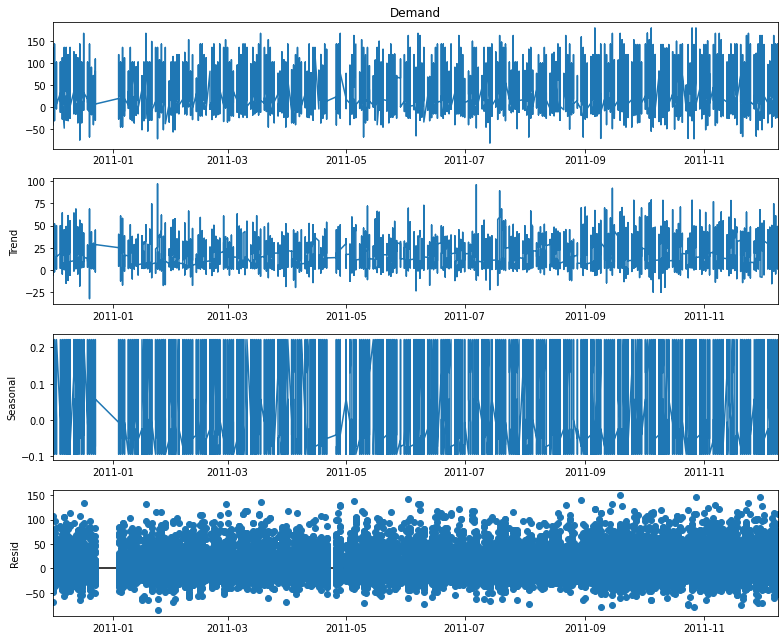

In [96]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize']= 11,9
# Perform additive decomposition
decomp = seasonal_decompose(df['Demand'], 
                            freq=12)
# Plot decomposition
decomp.plot()
plt.show()



In [97]:
# ***Check for Stationarity***
from statsmodels.tsa.stattools import adfuller
# Run Dicky-Fuller test
result = adfuller(df['Demand'])
# Print test statistic
print(result)

(-60.299609610219804, 0.0, 39, 243887, {'1%': -3.4303768131094654, '5%': -2.8615518510513525, '10%': -2.5667763078865113}, 1912490.484476835)


In [98]:
df1 = df.drop(['SMA_5','SMA_10','SMA_15','Error_10'], axis = 1)

In [99]:
df1.head()

,Demand
date,
2010-12-01,15.30
2010-12-01,20.34
2010-12-01,22.00
2010-12-01,20.34
2010-12-01,20.34


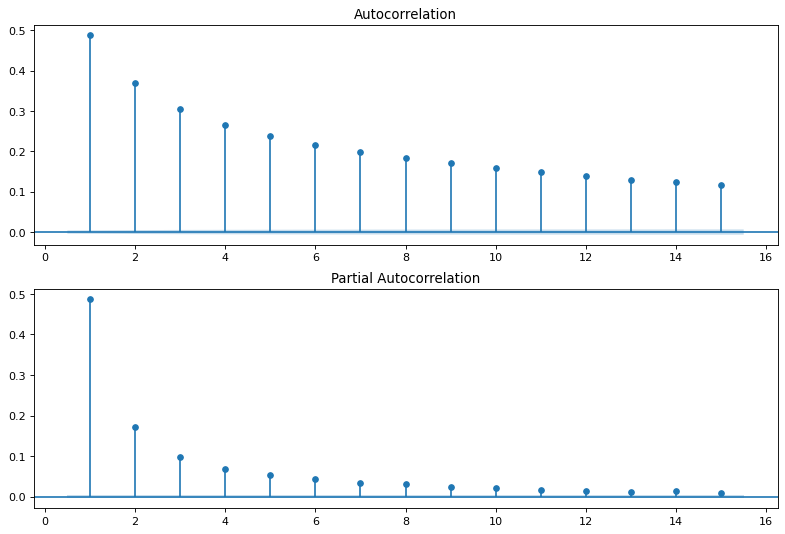

In [100]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8),dpi=80)
 
# Plot the ACF on ax1
plot_acf(df1, lags=15, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(df1, lags=15, zero=False, ax=ax2)

plt.show()




In [101]:
# ***Generating One Step Ahead Predictions in sample using values p= 1 and q=1***
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df1, order=(1,1,1))
results = model.fit()
# Print fit summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:               243927
Model:               SARIMAX(1, 1, 1)   Log Likelihood             -959503.852
Date:                Tue, 13 Apr 2021   AIC                        1919013.704
Time:                        23:44:57   BIC                        1919044.918
Sample:                             0   HQIC                       1919022.812
                             - 243927                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3256      0.001    265.428      0.000       0.323       0.328
ma.L1         -0.9114      0.001  -1368.852      0.000      -0.913      -0.910
sigma2       152.8239      0.138   1105.122      0.0

In [102]:
# Generate predictions for the last 12 periods in sample
one_step_forecast = results.get_prediction(start=-12)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

date
2011-12-09   20.58
2011-12-09   18.52
2011-12-09   18.21
2011-12-09   17.93
2011-12-09   17.67
2011-12-09   17.68
2011-12-09   20.73
2011-12-09   18.15
2011-12-09   15.36
2011-12-09   15.90
2011-12-09   17.26
2011-12-09   17.20
Name: predicted_mean, dtype: float64


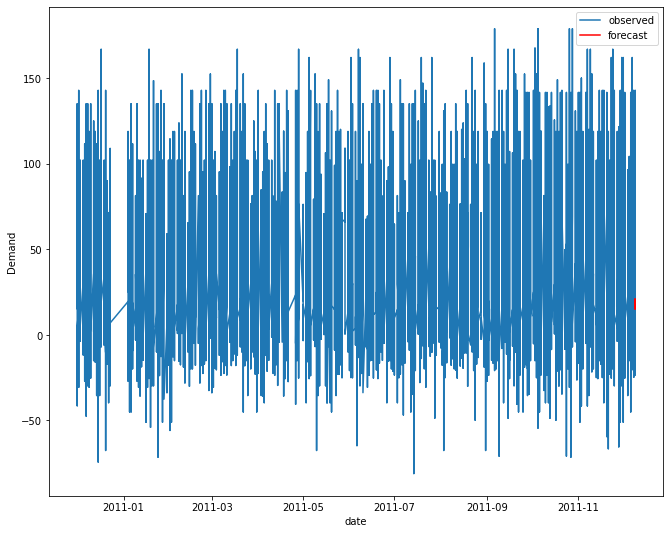

In [103]:
# plot the  data
plt.plot(df1.index, df1, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='green')

# set labels, legends and show plot
plt.xlabel('date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [104]:
# ***Dynamic Predictions***
# Generate predictions
one_step_forecast = results.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

date
2011-12-09   20.58
2011-12-09   20.84
2011-12-09   20.92
2011-12-09   20.95
2011-12-09   20.95
2011-12-09   20.96
2011-12-09   20.96
2011-12-09   20.96
2011-12-09   20.96
2011-12-09   20.96
2011-12-09   20.96
2011-12-09   20.96
Name: predicted_mean, dtype: float64


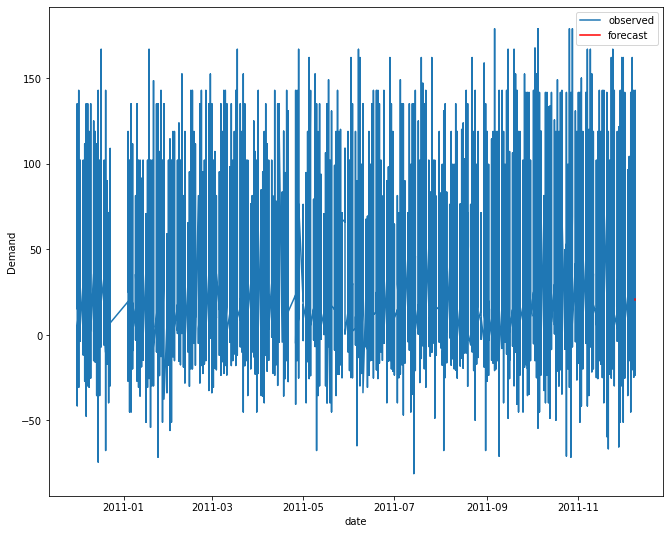

In [105]:
# plot the  data
plt.plot(df1.index, df1, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [106]:
# ***Out of the Sample Predictions***
forecast = results.get_forecast(steps =10)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)


243927   16.42
243928   16.94
243929   17.10
243930   17.16
243931   17.18
243932   17.18
243933   17.18
243934   17.18
243935   17.18
243936   17.18
Name: predicted_mean, dtype: float64


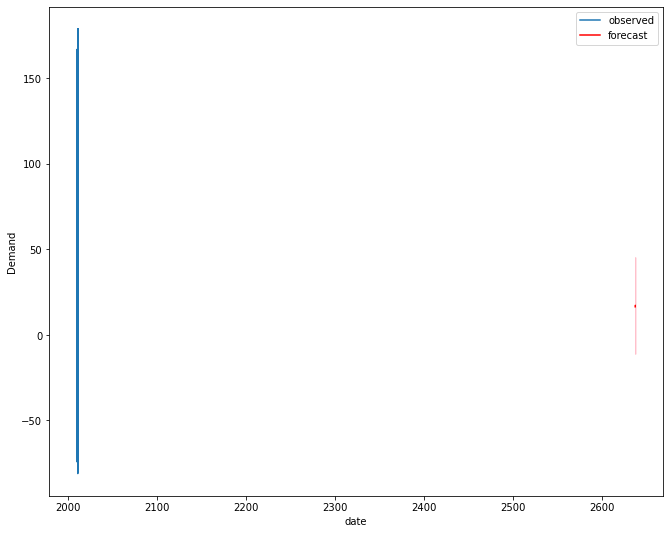

In [107]:
# plot the  data
plt.plot(df1.index, df1, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [108]:
# ***Grid search method to calculate the parameter p and q***
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(3):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = SARIMAX(df, order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)


0 0 None None
0 1 None None
0 2 None None
1 0 None None
1 1 None None
1 2 None None
2 0 None None
2 1 None None
2 2 None None


In [109]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, 
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

Empty DataFrame
Columns: [p, q, AIC, BIC]
Index: []
Empty DataFrame
Columns: [p, q, AIC, BIC]
Index: []


In [110]:
# ***Based on the results p=1 and q=1 and d=2*** 
# Instantiate the model
arma = SARIMAX(df1, order=(1,1,2))
results = arma.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                 Demand   No. Observations:               243927
Model:               SARIMAX(1, 1, 2)   Log Likelihood             -957577.177
Date:                Tue, 13 Apr 2021   AIC                        1915162.353
Time:                        23:45:47   BIC                        1915203.972
Sample:                             0   HQIC                       1915174.498
                             - 243927                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7900      0.002    495.298      0.000       0.787       0.793
ma.L1         -1.4343      0.002   -695.387      0.000      -1.438      -1.430
ma.L2          0.4384      0.002    219.261      0.0

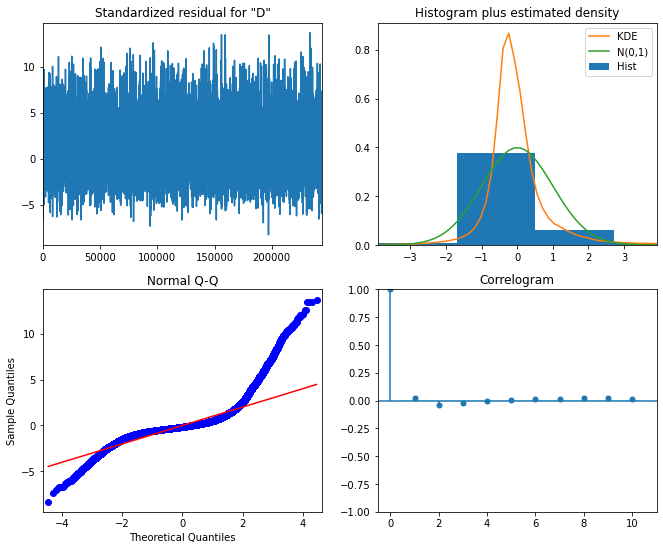

In [111]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

In [112]:
# ***Generate one step forecast***
# Generate predictions
one_step_forecast = results.get_prediction(start=-10)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

date
2011-12-09   17.11
2011-12-09   16.56
2011-12-09   16.31
2011-12-09   16.41
2011-12-09   19.22
2011-12-09   18.06
2011-12-09   15.26
2011-12-09   14.87
2011-12-09   16.11
2011-12-09   16.66
Name: predicted_mean, dtype: float64


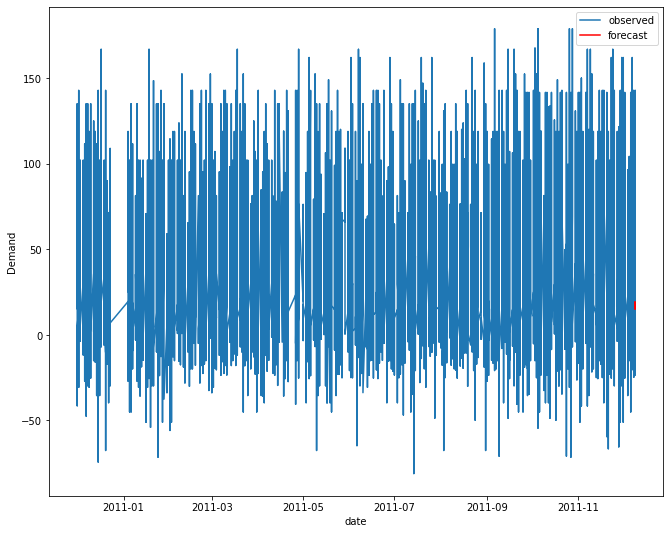

In [113]:
# plot the  data
plt.plot(df1.index, df1, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [114]:
# ***Generate Dynamic Predictions***
# Generate predictions
one_step_forecast = results.get_prediction(start=-10, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']

# Print best estimate predictions
print(mean_forecast)

date
2011-12-09   17.11
2011-12-09   17.31
2011-12-09   17.47
2011-12-09   17.59
2011-12-09   17.69
2011-12-09   17.77
2011-12-09   17.83
2011-12-09   17.88
2011-12-09   17.91
2011-12-09   17.94
Name: predicted_mean, dtype: float64


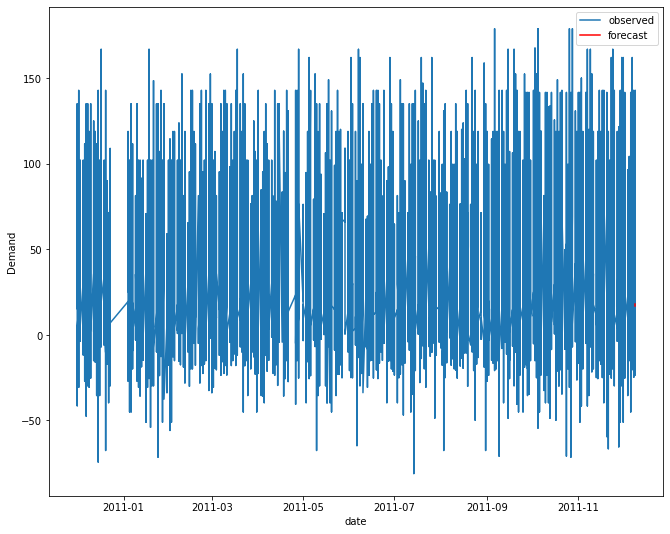

In [115]:
# plot the  data
plt.plot(df1.index, df1, label='observed')
# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')
# set labels, legends and show plot
plt.xlabel('date')
plt.ylabel('Demand')
plt.legend()
plt.show()

In [116]:
# ***Out of the Sample Predictions***
forecast = results.get_forecast(steps =10)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Demand']
upper_limits = confidence_intervals.loc[:,'upper Demand']
# Print best estimate predictions
print(mean_forecast)

243927   16.27
243928   16.61
243929   16.87
243930   17.08
243931   17.24
243932   17.37
243933   17.47
243934   17.55
243935   17.62
243936   17.67
Name: predicted_mean, dtype: float64


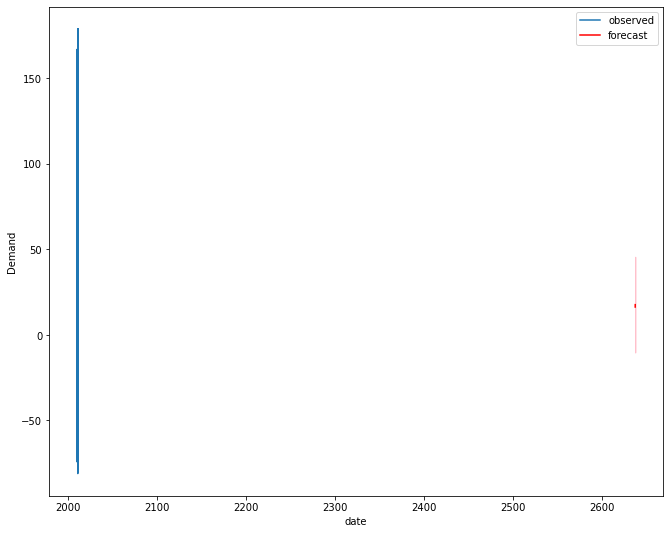

In [117]:
# plot the  data
plt.plot(df1.index, df1, label='observed')
# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')
# set labels, legends and show plot
plt.xlabel('date')
plt.ylabel('Demand')
plt.legend()
plt.show()

## LSTM

In [118]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings("ignore")

In [119]:
df=df1

In [120]:
df.head()

,Demand
date,
2010-12-01,15.30
2010-12-01,20.34
2010-12-01,22.00
2010-12-01,20.34
2010-12-01,20.34


In [121]:
df = df.iloc[:,0].values

In [122]:
df

array([15.3 , 20.34, 22.  , ..., 16.6 , 16.6 , 14.85])

In [123]:
df = df.reshape(-1,1)
df

array([[15.3 ],
       [20.34],
       [22.  ],
       ...,
       [16.6 ],
       [16.6 ],
       [14.85]])

In [124]:
df.shape

(243927, 1)

In [125]:
df.dtype

dtype('float64')

In [127]:
# Coverting to float as Neural networks work best with floats if it is already not there
df = df.astype('float32')
df.shape

(243927, 1)

In [128]:
# Scaling the data
scalar =MinMaxScaler()
df=scalar.fit_transform(df)

In [129]:
# Split into train and test
train = df[:-12,:]
test = df[-12:,:]

In [130]:
print(len(train), len(test))

243915 12


In [131]:
# Building the 2D array for supervised learning
def create_data(sequence, time_stamp):
    dataX = []
    dataY = []
    for i in range(len(sequence)-time_stamp-1):
        a = sequence[i:(i+time_stamp), 0]
        dataX.append(a)
        dataY.append(sequence[i + time_stamp, 0])
    return np.array(dataX),  np.array(dataY)

In [132]:
time_stamp = 1

In [133]:
# Apply the 2D array function to train and test datasets
train_X, train_Y = create_data(train,time_stamp)
test_X, test_Y =create_data(test, time_stamp)

In [134]:
# transform input from [samples, features] to [samples, timesteps, features] basically from 2D to 3D
train_X = np.reshape(train_X, (train_X.shape[0],1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

## Epochs 50
## Optimizer adam

In [135]:
# Build the LSTM Model
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(50, activation= 'relu', input_shape =(1, time_stamp)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
model.fit(train_X, train_Y, batch_size=1000, epochs =50, verbose=2)

Epoch 1/50
 - 2s - loss: 0.0323
Epoch 2/50
 - 1s - loss: 0.0033
Epoch 3/50
 - 1s - loss: 0.0033
Epoch 4/50
 - 1s - loss: 0.0032
Epoch 5/50
 - 1s - loss: 0.0032
Epoch 6/50
 - 1s - loss: 0.0031
Epoch 7/50
 - 1s - loss: 0.0030
Epoch 8/50
 - 1s - loss: 0.0030
Epoch 9/50
 - 1s - loss: 0.0029
Epoch 10/50
 - 1s - loss: 0.0028
Epoch 11/50
 - 1s - loss: 0.0028
Epoch 12/50
 - 1s - loss: 0.0027
Epoch 13/50
 - 1s - loss: 0.0026
Epoch 14/50
 - 1s - loss: 0.0026
Epoch 15/50
 - 1s - loss: 0.0025
Epoch 16/50
 - 1s - loss: 0.0025
Epoch 17/50
 - 1s - loss: 0.0025
Epoch 18/50
 - 1s - loss: 0.0024
Epoch 19/50
 - 1s - loss: 0.0024
Epoch 20/50
 - 1s - loss: 0.0024
Epoch 21/50
 - 1s - loss: 0.0024
Epoch 22/50
 - 1s - loss: 0.0024
Epoch 23/50
 - 1s - loss: 0.0024
Epoch 24/50
 - 1s - loss: 0.0023
Epoch 25/50
 - 1s - loss: 0.0023
Epoch 26/50
 - 1s - loss: 0.0023
Epoch 27/50
 - 1s - loss: 0.0023
Epoch 28/50
 - 1s - loss: 0.0023
Epoch 29/50
 - 1s - loss: 0.0023
Epoch 30/50
 - 1s - loss: 0.0023
Epoch 31/50
 - 1s -

## Epoch 80
## optimizer adadelta

In [136]:
model = Sequential()
# Adding the input layer and LSTM layer
model.add(LSTM(50, activation= 'relu', input_shape =(1, time_stamp)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adadelta', loss='mse')
model.fit(train_X, train_Y, batch_size=1000, epochs =50, verbose=2)

Epoch 1/50
 - 1s - loss: 0.0216
Epoch 2/50
 - 1s - loss: 0.0032
Epoch 3/50
 - 1s - loss: 0.0027
Epoch 4/50
 - 1s - loss: 0.0025
Epoch 5/50
 - 1s - loss: 0.0024
Epoch 6/50
 - 1s - loss: 0.0024
Epoch 7/50
 - 1s - loss: 0.0024
Epoch 8/50
 - 1s - loss: 0.0024
Epoch 9/50
 - 1s - loss: 0.0024
Epoch 10/50
 - 1s - loss: 0.0024
Epoch 11/50
 - 1s - loss: 0.0024
Epoch 12/50
 - 1s - loss: 0.0024
Epoch 13/50
 - 1s - loss: 0.0024
Epoch 14/50
 - 1s - loss: 0.0024
Epoch 15/50
 - 1s - loss: 0.0024
Epoch 16/50
 - 1s - loss: 0.0024
Epoch 17/50
 - 1s - loss: 0.0024
Epoch 18/50
 - 1s - loss: 0.0024
Epoch 19/50
 - 1s - loss: 0.0024
Epoch 20/50
 - 1s - loss: 0.0024
Epoch 21/50
 - 1s - loss: 0.0024
Epoch 22/50
 - 1s - loss: 0.0024
Epoch 23/50
 - 1s - loss: 0.0024
Epoch 24/50
 - 1s - loss: 0.0024
Epoch 25/50
 - 1s - loss: 0.0024
Epoch 26/50
 - 1s - loss: 0.0024
Epoch 27/50
 - 1s - loss: 0.0024
Epoch 28/50
 - 1s - loss: 0.0024
Epoch 29/50
 - 1s - loss: 0.0024
Epoch 30/50
 - 1s - loss: 0.0024
Epoch 31/50
 - 1s -

In [137]:
# Make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_Y = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_Y = scalar.inverse_transform([test_Y])
# calculate root mean squared error
train_score = math.sqrt(mean_squared_error(train_Y[0], train_predict[:,0]))
print('Train Score: %.3f RMSE' % (train_score))
test_score = math.sqrt(mean_squared_error(test_Y[0], test_predict[:,0]))
print('Test Score: %.3f RMSE' % (test_score))

Train Score: 12.527 RMSE
Test Score: 3.366 RMSE


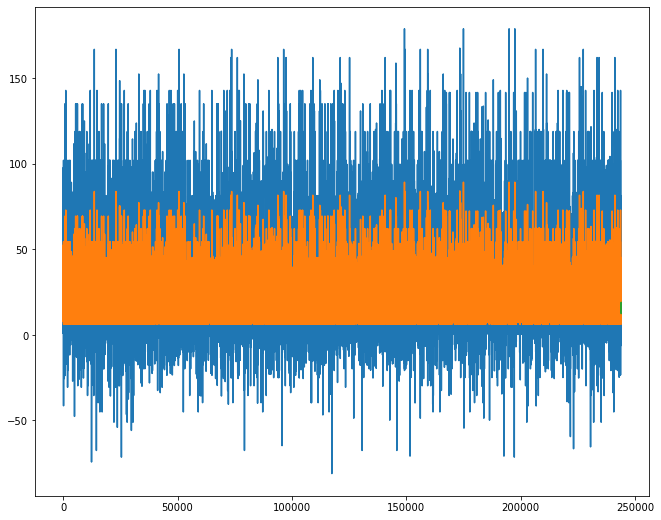

In [139]:
# shifting train
train_plot = np.empty_like(df) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stamp:len(train_predict)+time_stamp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stamp*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()

### ML models

In [140]:
df_ml =df1

In [141]:
df_ml.head()

,Demand
date,
2010-12-01,15.30
2010-12-01,20.34
2010-12-01,22.00
2010-12-01,20.34
2010-12-01,20.34


In [142]:
df_ml.dtypes


Demand    float64
dtype: object

In [143]:
df_ml1 = df_ml

In [144]:
df_ml1.shape

(243927, 1)

In [145]:
# reframe as supervised learning
# lab observation (t-1) is the input variable and t is the output variable.
df_m = pd.DataFrame()
print(df_m)

Empty DataFrame
Columns: []
Index: []


In [146]:
# Create 12 days of lag values to predict current observation
# Shift of 12 days in this case
for i in range(12,0,-1):
    df_m[['t-'+str(i)]] = df_ml1.shift(i)
print(df_m)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
date                                                                           
2010-12-01   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
2010-12-01   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
2010-12-01   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan 15.30   
2010-12-01   nan   nan   nan   nan   nan   nan   nan   nan   nan 15.30 20.34   
2010-12-01   nan   nan   nan   nan   nan   nan   nan   nan 15.30 20.34 22.00   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2011-12-09 30.00 70.80 23.40 19.80 19.80 15.00 15.00 15.00 15.00 15.60 23.40   
2011-12-09 70.80 23.40 19.80 19.80 15.00 15.00 15.00 15.00 15.60 23.40 16.60   
2011-12-09 23.40 19.80 19.80 15.00 15.00 15.00 15.00 15.60 23.40 16.60 10.20   
2011-12-09 19.80 19.80 15.00 15.00 15.00 15.00 15.60 23.40 16.60 10.20 12.60   
2011-12-09 19.80 15.00 15.00 15.00 15.00

In [147]:
# Create column t (original column)
df_m['t'] = df_ml1.values
print(df_m.head(12))

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
date                                                                           
2010-12-01   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
2010-12-01   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
2010-12-01   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan 15.30   
2010-12-01   nan   nan   nan   nan   nan   nan   nan   nan   nan 15.30 20.34   
2010-12-01   nan   nan   nan   nan   nan   nan   nan   nan 15.30 20.34 22.00   
2010-12-01   nan   nan   nan   nan   nan   nan   nan 15.30 20.34 22.00 20.34   
2010-12-01   nan   nan   nan   nan   nan   nan 15.30 20.34 22.00 20.34 20.34   
2010-12-01   nan   nan   nan   nan   nan 15.30 20.34 22.00 20.34 20.34 25.50   
2010-12-01   nan   nan   nan   nan 15.30 20.34 22.00 20.34 20.34 25.50 11.10   
2010-12-01   nan   nan   nan 15.30 20.34 22.00 20.34 20.34 25.50 11.10 11.10   
2010-12-01   nan   nan 15.30 20.34 22.00

In [148]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df_price = df_m[12:]
print(df_price)

            t-12  t-11  t-10   t-9   t-8   t-7   t-6   t-5   t-4   t-3   t-2  \
date                                                                           
2010-12-01 15.30 20.34 22.00 20.34 20.34 25.50 11.10 11.10 25.50 14.85 14.85   
2010-12-01 20.34 22.00 20.34 20.34 25.50 11.10 11.10 25.50 14.85 14.85 14.85   
2010-12-01 22.00 20.34 20.34 25.50 11.10 11.10 25.50 14.85 14.85 14.85 12.60   
2010-12-01 20.34 20.34 25.50 11.10 11.10 25.50 14.85 14.85 14.85 12.60 12.60   
2010-12-01 20.34 25.50 11.10 11.10 25.50 14.85 14.85 14.85 12.60 12.60 30.00   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2011-12-09 30.00 70.80 23.40 19.80 19.80 15.00 15.00 15.00 15.00 15.60 23.40   
2011-12-09 70.80 23.40 19.80 19.80 15.00 15.00 15.00 15.00 15.60 23.40 16.60   
2011-12-09 23.40 19.80 19.80 15.00 15.00 15.00 15.00 15.60 23.40 16.60 10.20   
2011-12-09 19.80 19.80 15.00 15.00 15.00 15.00 15.60 23.40 16.60 10.20 12.60   
2011-12-09 19.80 15.00 15.00 15.00 15.00

In [149]:
df_price.shape

(243915, 13)

#### First Split(75-25)

#### You can use any splits you want such as 50-50, 60-40, 70-30, 75-25, 80-20, and 85-15, etc. Here we are using a 75-25 split.

In [150]:
# Split Data into dependent(target) and independent(features) variables

p = df_price.values
# Lagged variables (features) and original time series data (target)
X2= p[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y2 = p[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [151]:
# Columns t-1 to t-12, which are the lagged variables
X2.shape

(243915, 12)

In [152]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
y2.shape

(243915,)

#### Train test split(80-20)

In [153]:
# Target(Y) Train-Test split

Y2 = y2
traintarget_size = int(len(Y2) * 0.80)   # Set split
print(traintarget_size)
train_target, test_target = Y2[:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

195132
Observations for Target: 243915
Training Observations for Target: 195132
Testing Observations for Target: 48783


In [154]:
# Features(X) Train-Test split

trainfeature_size = int(len(X2) * 0.80)
train_feature, test_feature = X2[:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 243915
Training Observations for feature: 195132
Testing Observations for feature: 48783


In [155]:
train_feature

array([[15.3 , 20.34, 22.  , ..., 14.85, 14.85, 14.85],
       [20.34, 22.  , 20.34, ..., 14.85, 14.85, 12.6 ],
       [22.  , 20.34, 20.34, ..., 14.85, 12.6 , 12.6 ],
       ...,
       [ 4.68,  4.68, 17.34, ...,  4.15,  0.95,  5.1 ],
       [ 4.68, 17.34, 17.34, ...,  0.95,  5.1 ,  2.5 ],
       [17.34, 17.34, 52.02, ...,  5.1 ,  2.5 ,  4.95]])

#### Benchmark Model

In [156]:
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression() # Create a linear regression object
  
reg = reg.fit(train_feature, train_target) # Fit it to the training data
  
# Create two predictions for the training and test sets
train_prediction = reg.predict(train_feature)
test_prediction = reg.predict(test_feature)

In [157]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 47.5
Tree on test set MAE%: 50.9


#### Decision Tree Model

In [158]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_beer = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree_beer.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_beer.score(train_feature, train_target))
print(decision_tree_beer.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


0.9997410113850865
-0.5594527940382499


In [159]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3,4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_beer = DecisionTreeRegressor(max_depth=d)
    decision_tree_beer.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_beer.score(train_feature, train_target))
    print(decision_tree_beer.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below.

max_depth= 2
0.23704483650810526
0.22635566188852974 

max_depth= 3
0.2638555765894701
0.2486400343680102 

max_depth= 4
0.2795599550134923
0.26378078940137994 

max_depth= 5
0.28921885398834735
0.2712121431579918 

max_depth= 7
0.30746931057702487
0.2718286485204744 

max_depth= 8
0.3188293560917743
0.26122049064441055 

max_depth= 10
0.3518425344829834
0.22491059634154187 



Tree on train set MAE%: 45.8
Tree on test set MAE%: 49.2


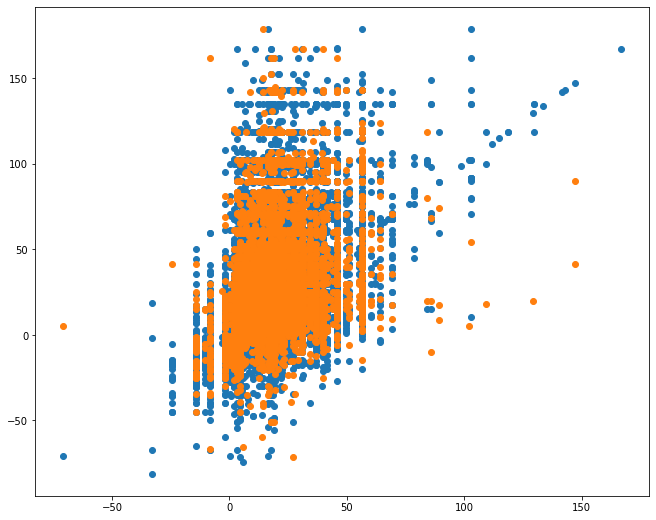

In [160]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_alcohol = DecisionTreeRegressor(max_depth=7) # Fill in best max depth score here
decision_tree_alcohol.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_alcohol.predict(train_feature)

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))


test_prediction = decision_tree_alcohol.predict(test_feature)

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.show()

#### Gradient Boosted Tree Model

In [161]:
from sklearn.ensemble import GradientBoostingRegressor

# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=7,
                                learning_rate=0.01,
                                n_estimators=500,
                                subsample=0.6,
                                random_state=99)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.30487753895869485
0.2885291936315012


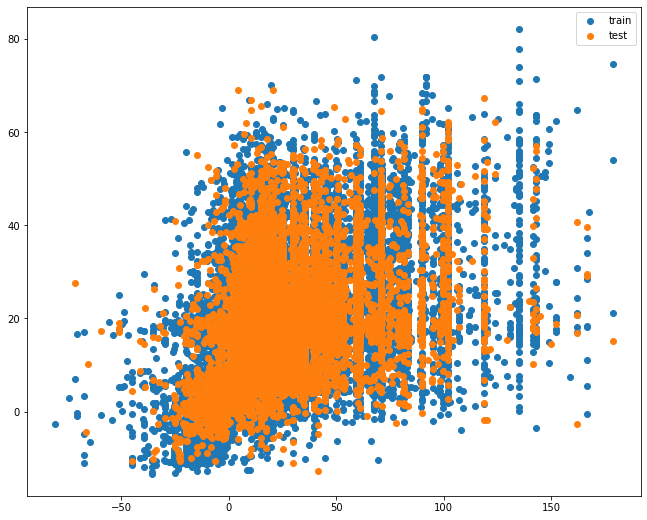

In [162]:
# Make predictions with our model
train_prediction = gbr.predict(train_feature)
test_prediction = gbr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [163]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 45.6
Tree on test set MAE%: 48.7


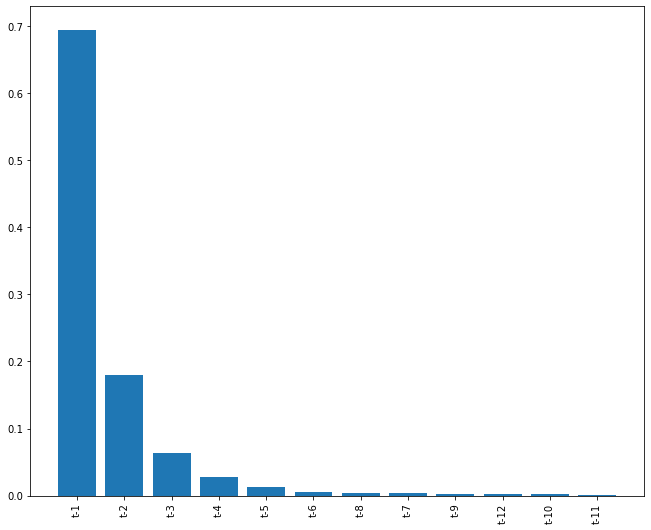

In [164]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x2 = range(X2.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plt.bar(x2, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

**Results:**

**Simple Moving Average**
<br>
**MAE** 5.11
<br>
**RMSE** 7.01
<br>
**MSE** 49.13
<br>
<br>
**Simple Exponential Smoothing**
<br>
**MAE** 9.40
<br>
**MSE** 152.90
<br>
**RMSE** 12.37
<br>
<br>
**Double Exponential Smoothing**
<br>
**MAE** 1358.30
<br>
**MSE** 2453416.14
<br>
**RMSE**156634
<br>
<br>
**Triple Explonential Smoothing**
<br>
**MAE** 10.99
<br>
**MSE** 195.18
<br>
**RMSE** 13.97
<br>
<br>
**LSTM**
<br>
**RMSE on test** 2904.490